# Customer segmentation

## data preparation

In [14]:
# import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing 

In [66]:
# import aggregated data of customers from R
train_data = pd.read_csv('cust.csv')
train_data2 = train_data.dropna()
train_data3 = train_data2.iloc[:,1:8]

In [68]:
# scaling the potential used columns using the min-max method
mm_scaler = preprocessing.MinMaxScaler()
x_train_minmax = mm_scaler.fit_transform(train_data3)

C:\Users\feifa\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [69]:
# change the data type back to dataframe
train_data3 = pd.DataFrame(x_train_minmax)

In [70]:
# recover the column names
train_data3.columns = train_data2.iloc[:,1:8].columns

## k-means modeling

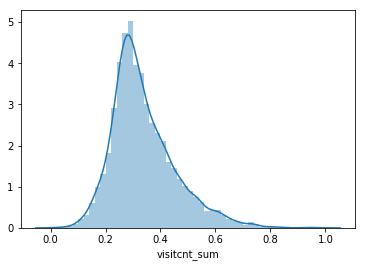

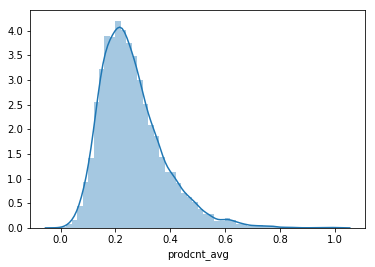

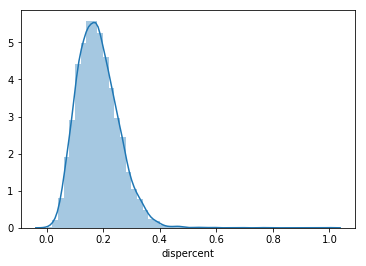

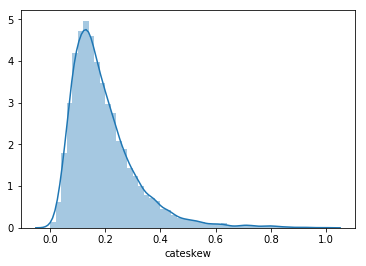

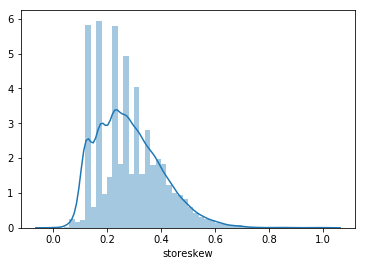

In [115]:
# check the histograms of every attribute that will be used
for i, col in enumerate(train_data3.iloc[:,2:7].columns):
    plt.figure(i)
    sns.distplot(train_data3.iloc[:,0:7][col])

In [8]:
# define a gap statstic function to find the best k
def optimalK(data, nrefs=3, maxClusters=15):
    """
    Calculates KMeans optimal K using Gap Statistic from Tibshirani, Walther, Hastie
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):

        # Holder for reference dispersion results
        refDisps = np.zeros(nrefs)

        # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp

        # Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_

        # Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)

        # Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)

    return (gaps.argmax() + 1, resultsdf)  # Plus 1 because index of 0 means 1 cluster is optimal, index 2 = 3 clusters are optimal

In [73]:
# find the best k
k, gapdf = optimalK(train_data3.iloc[:,[2,3,4,5,6]], nrefs=5, maxClusters=9)
print ('Optimal k is: ', k)

Optimal k is:  5


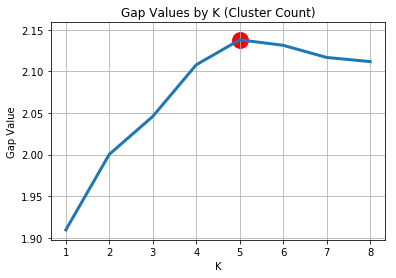

In [74]:
# plot the gap values by k
plt.plot(gapdf.clusterCount, gapdf.gap, linewidth=3)
plt.scatter(gapdf[gapdf.clusterCount == k].clusterCount, gapdf[gapdf.clusterCount == k].gap, s=250, c='r')
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Gap Value')
plt.title('Gap Values by K (Cluster Count)')
plt.show()

In [75]:
# since 5 clusters is the best, I extract the model with 5 clusters
km = KMeans(
    n_clusters=5, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=42
)
y_km = km.fit_predict(train_data3.iloc[:,2:7])

In [76]:
# print all the labels (clustering index) of customers
np.set_printoptions(threshold=sys.maxsize)
y_km

array([2, 0, 2, 4, 0, 0, 4, 3, 0, 3, 0, 0, 3, 4, 0, 4, 0, 0, 2, 0, 0, 3,
       1, 0, 0, 2, 3, 4, 2, 2, 2, 0, 3, 2, 3, 3, 4, 3, 0, 3, 0, 4, 4, 4,
       2, 0, 4, 2, 3, 0, 4, 0, 0, 0, 0, 3, 2, 0, 0, 4, 3, 0, 4, 0, 0, 3,
       0, 3, 0, 3, 2, 2, 0, 3, 1, 0, 0, 4, 0, 4, 2, 3, 1, 0, 4, 3, 0, 4,
       0, 3, 0, 0, 3, 4, 0, 0, 0, 3, 3, 2, 4, 3, 0, 4, 1, 4, 4, 3, 2, 4,
       3, 2, 0, 2, 2, 2, 3, 0, 2, 1, 0, 0, 3, 1, 3, 4, 0, 2, 4, 0, 1, 3,
       2, 4, 0, 0, 0, 4, 4, 0, 0, 0, 3, 2, 3, 3, 1, 1, 1, 3, 3, 3, 3, 4,
       0, 4, 0, 3, 3, 1, 0, 0, 3, 2, 4, 3, 4, 0, 0, 2, 1, 4, 0, 2, 3, 3,
       1, 4, 4, 0, 0, 4, 3, 4, 2, 2, 0, 4, 0, 3, 0, 1, 4, 1, 3, 2, 3, 0,
       2, 0, 0, 3, 1, 4, 0, 0, 3, 4, 1, 0, 3, 3, 0, 0, 0, 3, 1, 0, 2, 3,
       3, 3, 0, 4, 4, 4, 1, 2, 0, 0, 1, 1, 3, 4, 3, 0, 2, 2, 2, 3, 4, 3,
       0, 4, 0, 0, 4, 4, 4, 0, 3, 4, 0, 0, 1, 0, 2, 0, 2, 2, 4, 3, 2, 2,
       0, 3, 2, 3, 3, 0, 3, 0, 3, 0, 3, 4, 3, 3, 4, 4, 0, 4, 3, 3, 2, 0,
       3, 2, 2, 3, 3, 3, 3, 0, 0, 0, 2, 0, 4, 0, 0,

In [79]:
# cluster centers
km.cluster_centers_

array([[0.29366508, 0.23271727, 0.18407819, 0.16056235, 0.20939067],
       [0.39202978, 0.19083445, 0.15685697, 0.46537624, 0.2616893 ],
       [0.51590298, 0.1789597 , 0.15210556, 0.20764999, 0.24677625],
       [0.32521383, 0.25166693, 0.19511886, 0.1639903 , 0.43389218],
       [0.25256457, 0.45312456, 0.20026372, 0.13817731, 0.2749006 ]])

In [100]:
# export to tableau to see the revenue/profit level of each customer cluster
label = pd.DataFrame(y_km)
cust_label = pd.concat([train_data2, label], axis=1)

,cust_id,revenue_sum,profit_sum,visitcnt_sum,prodcnt_avg,dispercent,cateskew,storeskew,0
0,139662,9747.21,5987.198241,443,18.636085,0.182725,2.764834,0.749950,2
1,799924,10107.31,6018.799721,353,20.486684,0.306022,2.836385,0.384888,0
2,1399898,7392.69,3293.592152,602,11.499719,0.382083,3.720312,0.380937,2
3,1749580,5375.40,2515.793601,191,21.629045,0.523283,2.538427,1.298857,4
4,1889991,9665.97,4004.741900,353,15.181325,0.584671,1.957431,1.073118,0
5,1979557,4385.18,2770.862642,300,10.966728,0.428466,3.361191,0.384897,0
6,2109544,6201.83,2335.947365,177,32.093417,0.415845,3.754682,0.649729,4
7,2559894,7314.18,3686.162083,441,13.072351,0.261843,2.648629,3.722850,3
8,2649945,5222.20,2152.505781,289,10.489688,0.457074,2.145032,0.733705,0
9,3249808,5455.65,3180.680274,298,14.201828,0.384615,3.235394,4.097221,3


In [113]:
# change the column names
cust_label = cust_label.rename({0:"label"}, axis='columns') 
cust_label

,cust_id,revenue_sum,profit_sum,visitcnt_sum,prodcnt_avg,dispercent,cateskew,storeskew,label
0,139662,9747.21,5987.198241,443,18.636085,0.182725,2.764834,0.749950,2
1,799924,10107.31,6018.799721,353,20.486684,0.306022,2.836385,0.384888,0
2,1399898,7392.69,3293.592152,602,11.499719,0.382083,3.720312,0.380937,2
3,1749580,5375.40,2515.793601,191,21.629045,0.523283,2.538427,1.298857,4
4,1889991,9665.97,4004.741900,353,15.181325,0.584671,1.957431,1.073118,0
5,1979557,4385.18,2770.862642,300,10.966728,0.428466,3.361191,0.384897,0
6,2109544,6201.83,2335.947365,177,32.093417,0.415845,3.754682,0.649729,4
7,2559894,7314.18,3686.162083,441,13.072351,0.261843,2.648629,3.722850,3
8,2649945,5222.20,2152.505781,289,10.489688,0.457074,2.145032,0.733705,0
9,3249808,5455.65,3180.680274,298,14.201828,0.384615,3.235394,4.097221,3


In [114]:
# outout the file
cust_label.to_csv('cust_label.csv')

# Product segmentation

## data preparation

In [2]:
# import aggregated data of customers from R
train_data = pd.read_csv('prod_info_summary.csv')
train_data2 = train_data.dropna()
train_data3 = train_data2.iloc[:,[6,7,8,9,11,12,14]]

In [3]:
# scaling the potential used columns using the min-max method
mm_scaler = preprocessing.MinMaxScaler()
x_train_minmax = mm_scaler.fit_transform(train_data3)

C:\Users\feifa\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [4]:
# change the data type back to dataframe
train_data3 = pd.DataFrame(x_train_minmax)

In [5]:
# recover the column names
train_data3.columns = train_data2.iloc[:,[6,7,8,9,11,12,14]].columns

## k-means modeling

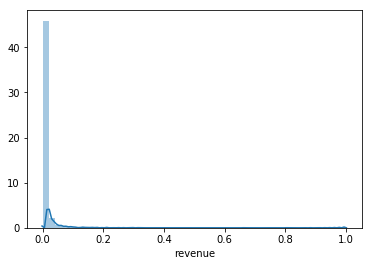

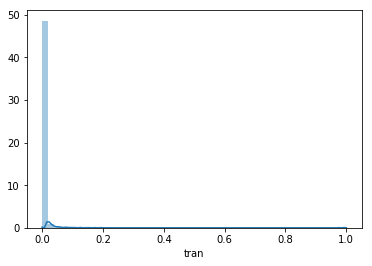

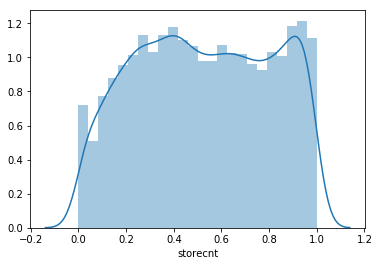

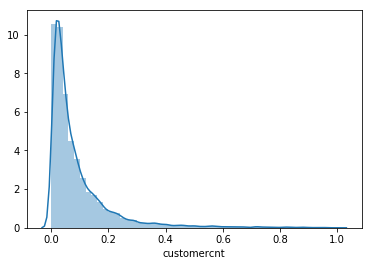

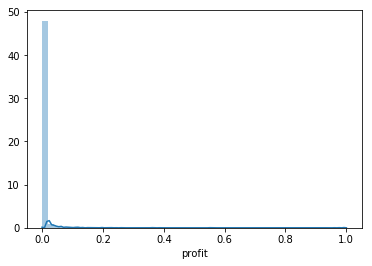

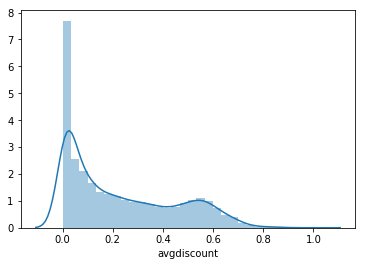

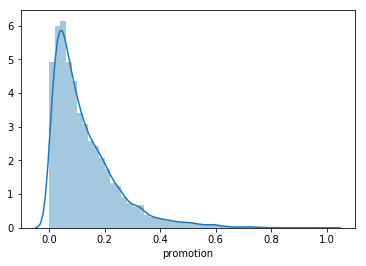

In [6]:
# check the histograms of every column
for i, col in enumerate(train_data3.iloc[:,0:7].columns):
    plt.figure(i)
    sns.distplot(train_data3.iloc[:,0:7][col])

In [9]:
# find the best k #use all 7 variables
k, gapdf = optimalK(train_data3, nrefs=5, maxClusters=10)
print ('Optimal k is: ', k)

Optimal k is:  9


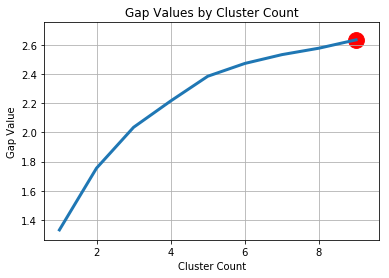

In [10]:
# plot the gap values by k
plt.plot(gapdf.clusterCount, gapdf.gap, linewidth=3)
plt.scatter(gapdf[gapdf.clusterCount == k].clusterCount, gapdf[gapdf.clusterCount == k].gap, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')
plt.show()

In [11]:
# take 5 since it's the elbow point, I extract the model with 5 clusters
km = KMeans(
    n_clusters=5, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=42
)
y_km = km.fit_predict(train_data3)

In [12]:
y_km

array([3, 0, 3, ..., 1, 2, 1])

In [13]:
# cluster centers
km.cluster_centers_

array([[4.24341196e-03, 1.72863689e-03, 5.72888077e-01, 6.39448096e-02,
        2.08671914e-03, 9.69467931e-02, 8.89680954e-02],
       [1.74972900e-03, 6.80235468e-04, 2.07325152e-01, 2.11432241e-02,
        8.84534175e-04, 8.50544604e-02, 4.70683807e-02],
       [1.53862880e-03, 4.02051069e-04, 3.20645248e-01, 2.62914758e-02,
        8.19348393e-04, 5.00562383e-01, 1.52374733e-01],
       [2.98084436e-02, 1.34909801e-02, 8.98414125e-01, 2.56253177e-01,
        1.98630997e-02, 9.95782304e-02, 1.36648383e-01],
       [1.09354326e-02, 3.11375319e-03, 7.47251604e-01, 1.27403190e-01,
        4.62426037e-03, 4.86995349e-01, 2.70920267e-01]])

# Product segmentation

## k-means modeling

In [15]:
# import aggregated data of customers
train_data = pd.read_csv('store_seg.csv')
train_data = train_data.dropna()

In [16]:
# check the head of data
train_data.head()

,store_id,cherry_picker_skew,loyalty_skew
0,584,0.330800,0.335243
1,349,0.263750,0.618940
2,684,0.575104,0.786937
3,320,0.659029,0.858539
4,554,1.024586,0.853632


In [17]:
from sklearn import preprocessing 
# scaling the potential used columns using the min-max method
mm_scaler = preprocessing.MinMaxScaler()
x_train_minmax = mm_scaler.fit_transform(train_data)
# change the data type back to dataframe
train_data = pd.DataFrame(x_train_minmax)

C:\Users\feifa\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


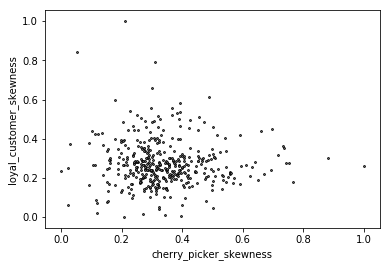

In [18]:
# plot the two measurement columns on a 2-D map
plt.scatter(
   train_data.iloc[:, 1], train_data.iloc[:, 2],
   c='white', marker='o',
   edgecolor='black', s=3
)
plt.xlabel('cherry_picker_skewness')
plt.ylabel('loyal_customer_skewness')
plt.show()

In [19]:
#Use silhouette score to measure the performance of clustering, larger score means better segmentation
range_n_clusters = list (range(2,10))

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(train_data.iloc[:,1:3])
    centers = clusterer.cluster_centers_
    score = silhouette_score(train_data.iloc[:,1:3], preds)
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.3499164015564002)
For n_clusters = 3, silhouette score is 0.39961424610272456)
For n_clusters = 4, silhouette score is 0.32514476290406275)
For n_clusters = 5, silhouette score is 0.33058585128784057)
For n_clusters = 6, silhouette score is 0.31070925644769687)
For n_clusters = 7, silhouette score is 0.3314928128844222)
For n_clusters = 8, silhouette score is 0.3303858066704536)
For n_clusters = 9, silhouette score is 0.3416463638495664)


In [20]:
# since 2 clusters is the best, I extract the model with 2 clusters
km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(train_data.iloc[:,1:3])

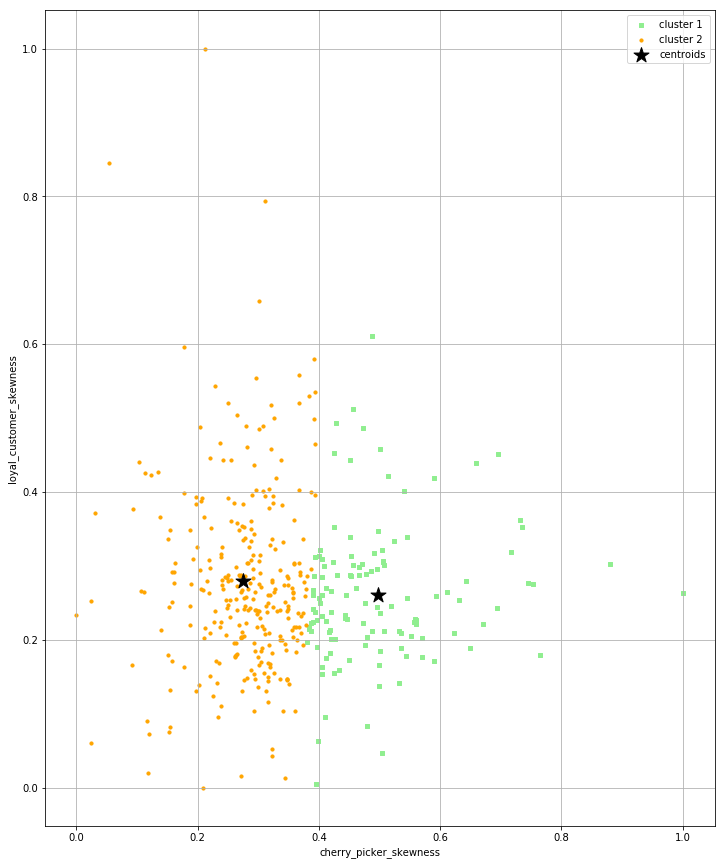

In [21]:
# plot the 2 clusters and their centers
plt.figure(figsize=(12, 15))
plt.scatter(
    train_data.iloc[y_km == 0, 1], train_data.iloc[y_km == 0, 2],
    s=10, c='lightgreen',
    marker='s', edgecolor='face',
    label='cluster 1'
)

plt.scatter(
    train_data.iloc[y_km == 1, 1], train_data.iloc[y_km == 1, 2],
    s=10, c='orange',
    marker='o', edgecolor='face',
    label='cluster 2'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='black', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.xlabel("cherry_picker_skewness")
plt.ylabel("loyal_customer_skewness")
plt.grid()
plt.show()

## hierarchy clustering

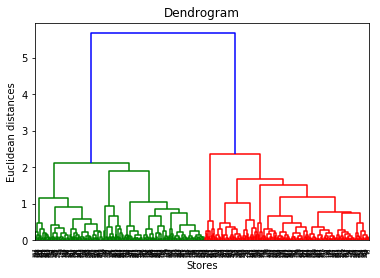

In [22]:
#Lets create a dendrogram variable linkage is actually the algorithm
dendrogram = sch.dendrogram(sch.linkage(train_data, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Stores')
plt.ylabel('Euclidean distances')
plt.show()

In [23]:
# use silhourtte again to decide the best number of clusters in hc
range_n_clusters = list (range(2,10))
print ("Number of clusters from 2 to 9: \n", range_n_clusters)

for n_clusters in range_n_clusters:
    hc = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage ='ward')
    preds = hc.fit_predict(train_data.iloc[:,1:3])
    centers = clusterer.cluster_centers_
    score = silhouette_score(train_data.iloc[:,1:3], preds)
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

Number of clusters from 2 to 9: 
 [2, 3, 4, 5, 6, 7, 8, 9]
For n_clusters = 2, silhouette score is 0.26969569423536494)
For n_clusters = 3, silhouette score is 0.3348184228317)
For n_clusters = 4, silhouette score is 0.32092920494838323)
For n_clusters = 5, silhouette score is 0.3085449490244845)
For n_clusters = 6, silhouette score is 0.31689565851562174)
For n_clusters = 7, silhouette score is 0.3040679074202849)
For n_clusters = 8, silhouette score is 0.31837743939711605)
For n_clusters = 9, silhouette score is 0.3106888275252543)


In [24]:
# extract the 2-cluster hc model since it is the best
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='ward')
y_hc = hc.fit_predict(train_data.iloc[:,1:3])

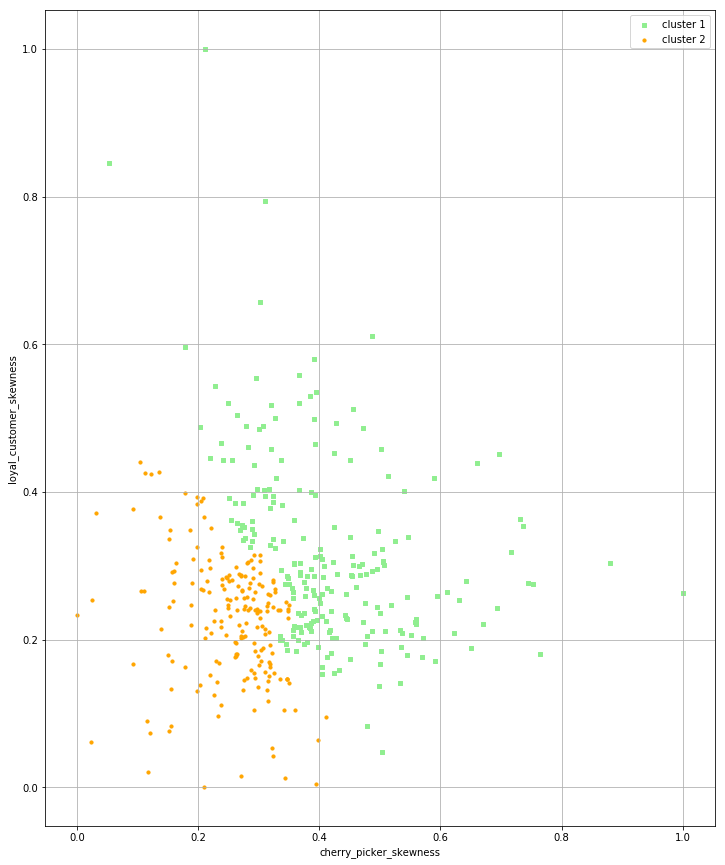

In [25]:
# plot the 2 clusters
plt.figure(figsize=(12, 15))
plt.scatter(
    train_data.iloc[y_hc == 0, 1], train_data.iloc[y_hc == 0, 2],
    s=10, c='lightgreen',
    marker='s', edgecolor='face',
    label='cluster 1'
)

plt.scatter(
    train_data.iloc[y_hc == 1, 1], train_data.iloc[y_hc == 1, 2],
    s=10, c='orange',
    marker='o', edgecolor='face',
    label='cluster 2'
)

plt.legend(scatterpoints=1)
plt.xlabel("cherry_picker_skewness")
plt.ylabel("loyal_customer_skewness")
plt.grid()
plt.show()